<a href="https://colab.research.google.com/github/Fuenfgeld/2022TeamADataManagementBC/blob/main/data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example data analyse for cardiovasculare disase

## import required libraries

In [1]:
import sklearn.datasets as ds
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration

Data can be found on kaggle on https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

-    Objective: factual information;
-    Examination: results of medical examination;
-    Subjective: information given by the patient.


Features:

-    Age | Objective Feature | age | int (days)
-    Height | Objective Feature | height | int (cm) |
-    Weight | Objective Feature | weight | float (kg) |
-    Gender | Objective Feature | gender | categorical code |
-    Systolic blood pressure | Examination Feature | ap_hi | int |
-    Diastolic blood pressure | Examination Feature | ap_lo | int |
-    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
-    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
-    Smoking | Subjective Feature | smoke | binary |
-    Alcohol intake | Subjective Feature | alco | binary |
-    Physical activity | Subjective Feature | active | binary |
-    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


## data exploration

### simple statistics

In [2]:
df = pd.read_csv("./data/cardio_train.csv", sep = ';', index_col = 0)

In [3]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Konvertiere Alter(Tage) in Alter (Jahre)

In [4]:
df['age'] = np.array(df['age'] / 365.24219 , dtype=int) # mean Gregorian year 365.2425 

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762462,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Female    45530
Male      24470
dtype: int64


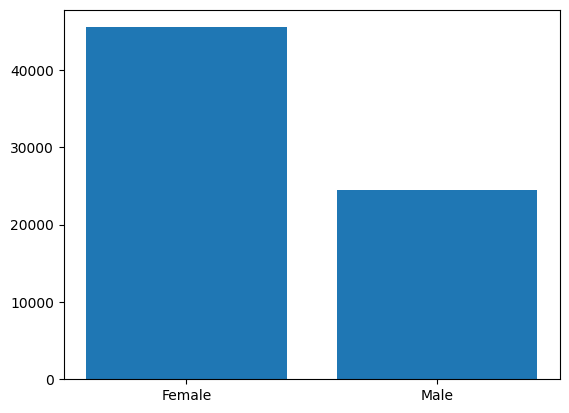

In [6]:
sex_df = pd.Categorical(df['gender'])
sex_df = sex_df.rename_categories(["Female","Male"]) # dosen't know which is female or male
plt.bar(["Female","Male"],sex_df.value_counts()) # show the ratio between male/female
print(sex_df.value_counts())
plt.show()

## Data cleaning

### weight cleaning

In [7]:
print(df[['age','weight']].sort_values('weight'))

       age  weight
id                
82567   51    10.0
48318   59    11.0
85931   59    21.0
42156   55    22.0
38312   63    23.0
...    ...     ...
87612   45   180.0
52564   53   181.0
87498   57   183.0
71945   41   200.0
618     45   200.0

[70000 rows x 2 columns]


In [8]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [9]:
print(df[['age','weight']].sort_values('weight'))

       age  weight
id                
99440   52    52.0
35854   45    52.0
70040   53    52.0
48100   56    52.0
35883   48    52.0
...    ...     ...
26280   51   106.0
68658   55   106.0
5391    55   106.0
26374   59   106.0
70209   58   106.0

[63866 rows x 2 columns]


### blood pressure cleaning

In [10]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [11]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [12]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


### corelation

In [13]:
df.cov()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,45.478160,-0.079091,-3.794608,4.955107,18.906634,8.126006,0.685649,0.368775,-0.089117,-0.042098,-0.032263,0.799644
gender,-0.079091,0.226690,1.631370,0.712581,0.288925,0.191961,-0.013397,-0.006454,0.044867,0.017682,0.001337,-0.001149
height,-3.794608,1.631370,46.651278,19.704588,-1.040030,0.412742,-0.317259,-0.117142,0.353311,0.133318,-0.014478,-0.105039
weight,4.955107,0.712581,19.704588,134.903715,36.955181,20.178214,1.006433,0.577120,0.181089,0.147588,-0.055045,0.917349
ap_hi,18.906634,0.288925,-1.040030,36.955181,189.388438,78.880316,1.725653,0.646354,0.079842,0.072013,0.016547,2.948006
ap_lo,8.126006,0.191961,0.412742,20.178214,78.880316,67.883707,0.810655,0.286588,0.042193,0.047447,0.002824,1.324309
cholesterol,0.685649,-0.013397,-0.317259,1.006433,1.725653,0.810655,0.449002,0.172721,0.000858,0.003808,0.002085,0.072562
gluc,0.368775,-0.006454,-0.117142,0.577120,0.646354,0.286588,0.172721,0.322177,-0.001583,0.000464,-0.001602,0.024366
smoke,-0.089117,0.044867,0.353311,0.181089,0.079842,0.042193,0.000858,-0.001583,0.078299,0.021247,0.002963,-0.003282
alco,-0.042098,0.017682,0.133318,0.147588,0.072013,0.047447,0.003808,0.000464,0.021247,0.049187,0.002255,-0.001634


## Metadata exploration

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.
    
Description with UCUM in https://ucum.org/ucum.html#section-Grammar-of-Units-and-Unit-Terms#section-Derived-Unit-Atoms;


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) | 
- Weight | Objective Feature | weight | float (kg) |

- Gender | Objective Feature | gender | categorical code | -> 1 - women, 2 - men
- Systolic blood pressure | Examination Feature | ap_hi | int | -> Endconing and norm(80 mmHg) missing 
- Diastolic blood pressure | Examination Feature | ap_lo | int | -> Endconing and norm(120 mmHg) 
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | -> Range missing
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | -> Range missing
- Smoking | Subjective Feature | smoke | binary | SNOMED CODE
- Alcohol intake | Subjective Feature | alco | binary | SNOMED CODE
- Physical activity | Subjective Feature | active | binary | SNOMED CODE
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary | ICD-10

### Metadaten Schema

https://guides.library.yale.edu/rdm_healthsci/metadata_schema

https://fairsharing.org/search?fairsharingRegistry=Standard

- Wer besitzt die Daten? -> Svetlana Ulianova (Owner)
- Woher kommen die Daten? -> Alle Datensatzwerte wurden zum Zeitpunkt der ärztlichen Untersuchung erhoben.
- Zugriffrechte der Daten / Welche Lizenz? -> Public/Unknown
- Wo werden die Daten genutz/geteilt? -> Kaggle 
- Benutzung/Vewendung der Daten? -> Klassifizierung von Herzkrankheiten
- Wann wurden die Daten erstellt/geändert? -> 2019
- Datum der einzelnen Aufnahmen? -> (Hinzufügen?)


https://www.dublincore.org/specifications/dublin-core/dcmi-terms/#section-1

    Coverage
    Description
    Language
    Relation
    Source
    Subjet 
    Title
    Author / creator
    Contributor
    Publisher
    Rights
    Date
    Format
    Identifier
    Type 

(Identifiers, Änderungen, Dauer/Erhaltung, Statistics)

In [14]:
simple_data_feature = ["age","height","weight","ap_hi","ap_lo","smoke","cardio"]
df_new = df[simple_data_feature]
df_new.head(10)

,age,height,weight,ap_hi,ap_lo,smoke,cardio
id,,,,,,,
0,50,168,62.0,110,80,0,0
1,55,156,85.0,140,90,0,1
2,51,165,64.0,130,70,0,1
3,48,169,82.0,150,100,0,1
4,47,156,56.0,100,60,0,0
8,59,151,67.0,120,80,0,0
9,60,157,93.0,130,80,0,0
12,61,178,95.0,130,90,0,1
13,48,158,71.0,110,70,0,0


In [15]:
%%capture
df_new['smoke'] = np.random.randint(0,3,len(df_new['smoke'])) # map to smoking states
df_new['cardio'] = np.random.randint(0,10,len(df_new['cardio'])) # map to ICD-Code

In [16]:
df_new.head(5)

,age,height,weight,ap_hi,ap_lo,smoke,cardio
id,,,,,,,
0,50,168,62.0,110,80,2,9
1,55,156,85.0,140,90,1,8
2,51,165,64.0,130,70,1,8
3,48,169,82.0,150,100,0,0
4,47,156,56.0,100,60,0,2
